<a href="https://colab.research.google.com/github/hai1862003/Analyzing-Movies/blob/main/Day78_Seaborn_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
df = pd.read_csv('/content/Data/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [ ]:
#check if naN values
df.isna().any()
#==> no Nan Values

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [ ]:
#check duplicate data
df.duplicated().any()
#no total duplication

False

### Data Type Conversions

In [ ]:
df.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
cols = ['USD_Production_Budget',	'USD_Worldwide_Gross',	'USD_Domestic_Gross']


for column in cols:
  #replace '$,' in each column with ''
  df[column] = df[column].replace(r'[$,]', '', regex = True)
  #turn to type int64
  df[column] = pd.to_numeric(df[column])



**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
des_stats =df.describe()
#avg production budget
des_stats


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
#films grossed 0 domestically
gross_0_US = df[df['USD_Domestic_Gross'] == 0]
print(f' number of movies that grossed 0 domestically is {len(gross_0_US)}')

gross_0_US.sort_values('USD_Production_Budget', ascending = False).head()

 number of movies that grossed 0 domestically is 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
gross_0_world = df[df['USD_Worldwide_Gross'] == 0]
print(f' number of movies that grossed 0 domestically is {len(gross_0_world)}')
gross_0_world.sort_values('USD_Production_Budget', ascending = False).head()

 number of movies that grossed 0 domestically is 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [ ]:
international_releases = df.loc[(df['USD_Domestic_Gross'] == 0) &
                                  (df['USD_Worldwide_Gross'] != 0)]

international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
international_releases = df.query(expr = 'USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
len(international_releases)

155

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
#get movies that have not yet been published
not_published = df[df['Release_Date'] >= scrape_date]

#drop those films of data
data_clean = df.drop( index = not_published.index, axis = 0)


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
#movies cost > world_rev
over_cost = data_clean.query(expr = 'USD_Production_Budget > USD_Worldwide_Gross')

#percent of movies that lost mney
len(over_cost)/len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

In [ ]:
import seaborn as sns

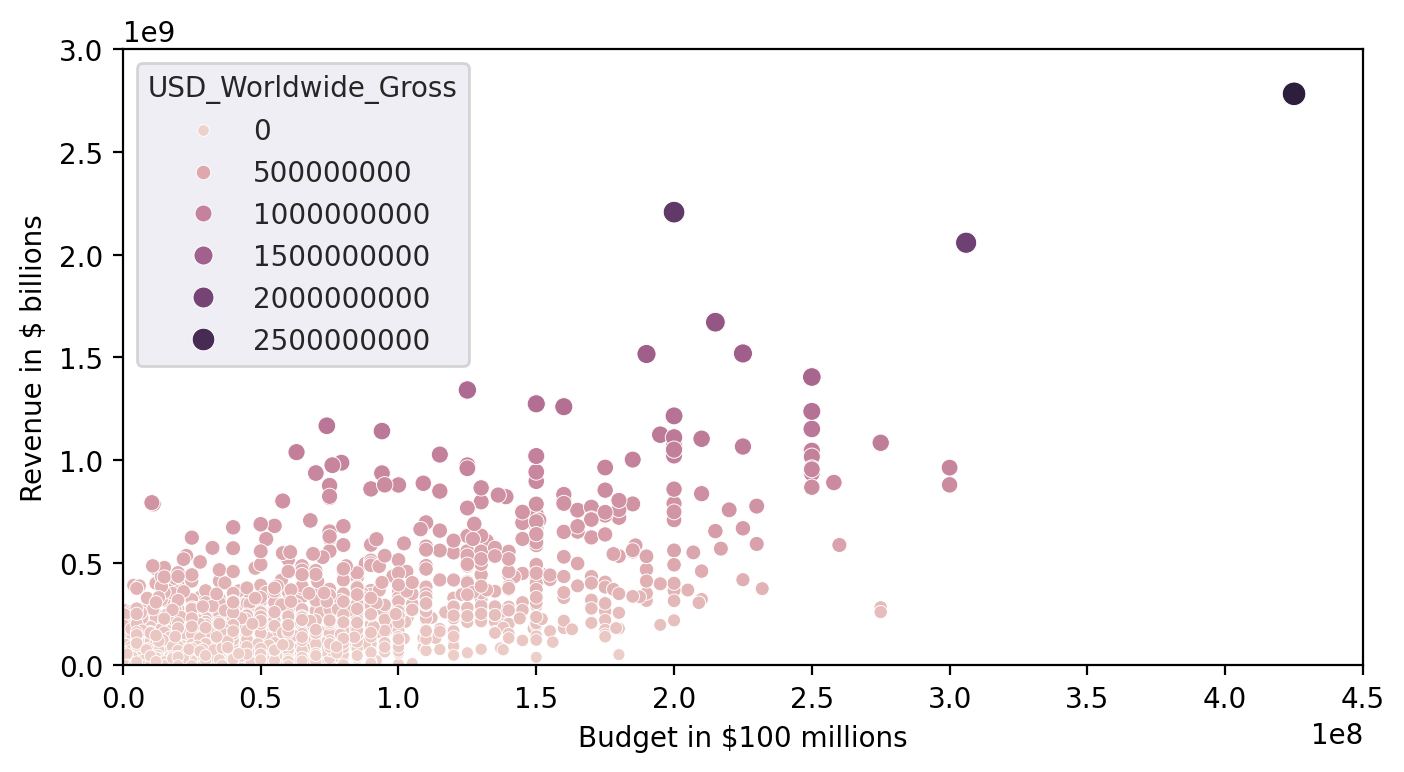

In [ ]:
#change figsize
fig,ax = plt.subplots(figsize = [8,4], dpi=200)
#draw graph, scatterplto between a movie budget and its worldwide revenue
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross', # colour
                size='USD_Worldwide_Gross') # dot size)


  ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



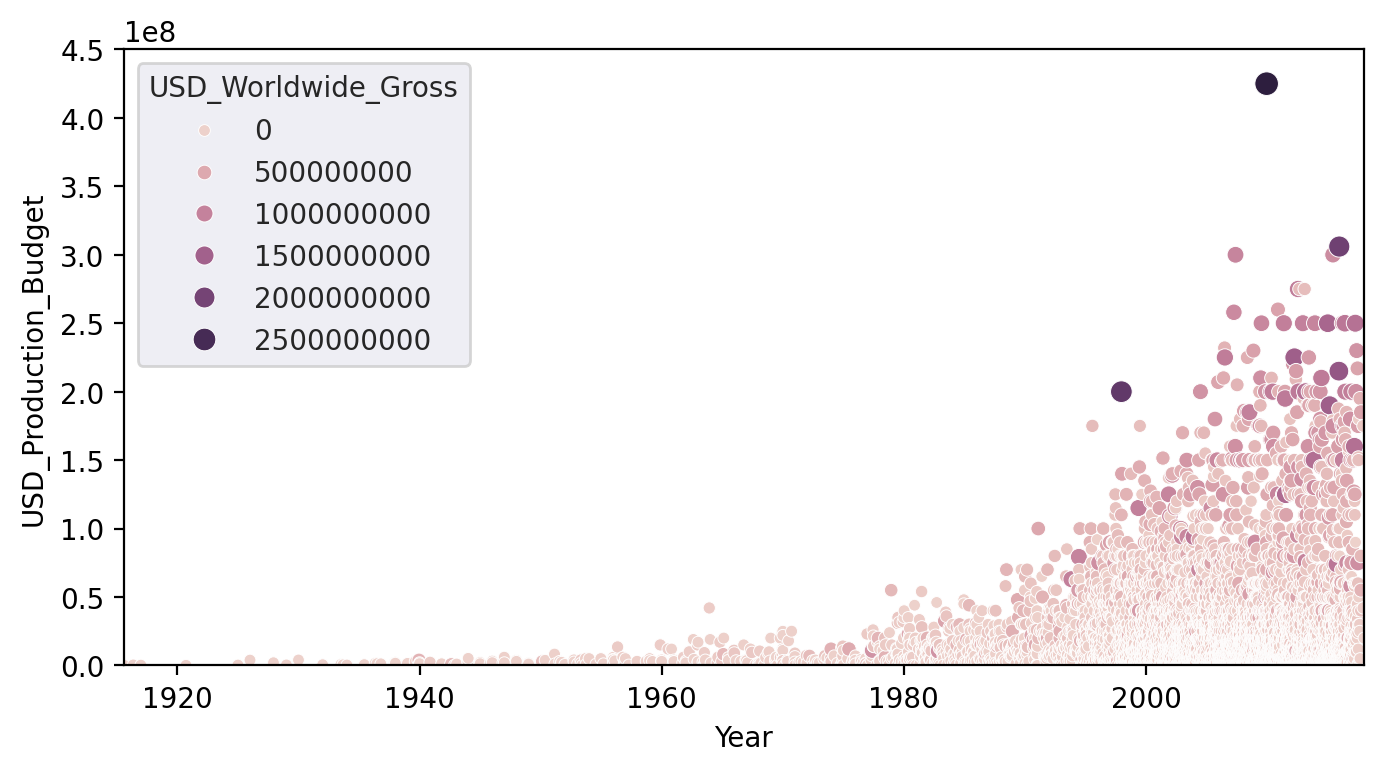

In [ ]:
#change figsize
fig2,ax2 = plt.subplots(figsize = [8,4], dpi=200)
#draw graph, scatterplto between a movie budget and its worldwide revenue
with sns.axes_style('darkgrid'):
  ax2 = sns.scatterplot(data=data_clean,
                y='USD_Production_Budget',
                x='Release_Date',
                hue='USD_Worldwide_Gross', # colour
                size='USD_Worldwide_Gross') # dot size)


  ax2.set(ylim=(0, 450000000),
       xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
       xlabel='Year',)
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
#create datetime object
date_time = pd.DatetimeIndex(data_clean['Release_Date'])
#get year from datetimeobject
year = date_time.year
#floor divison to get decade?
decades = year//10 * 10
#put decade data in column as 'Decade'
data_clean['Decade'] = decades
#show
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


<Axes: xlabel='Budget in $100 millions', ylabel='Revenue in $ billions'>

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
#old films: decade <=1960
time_cutoff = 1960
old_films = data_clean[data_clean['Decade'] <= time_cutoff]
#new films: decade >= 1970 (or >1960)
new_films = data_clean[data_clean['Decade'] > time_cutoff]

#how many films releaser prior to 1970
len(old_films)
#most expensive film
old_films.sort_values('USD_Production_Budget', ascending = False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


# Seaborn Regression Plots

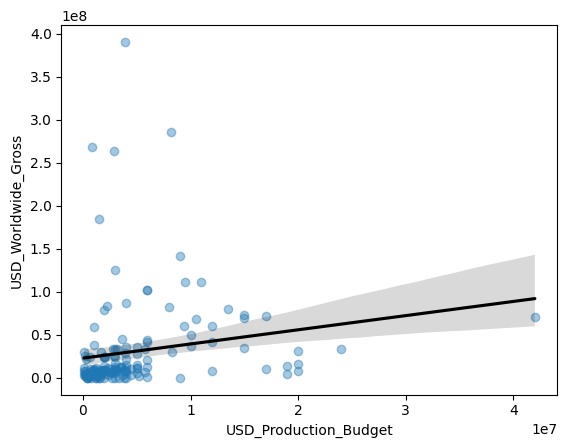

In [ ]:
#regression: more cost = more money for old films?
fig, ax = plt.subplots()
with sns.axes_style("whitegrid"):
 ax = sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})




**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

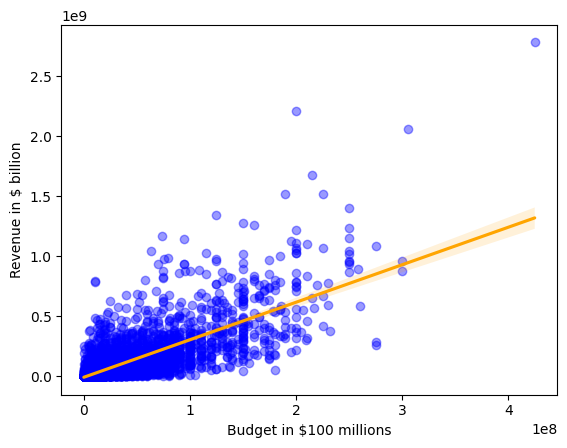

In [ ]:
fig, ax = plt.subplots()
with sns.axes_style("darkgrid"):
 ax = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4, 'color': 'blue'},
            line_kws = {'color': 'orange'})
 ax.set(xlabel = 'Budget in $100 millions',
        ylabel = 'Revenue in $ billion')

 # ==> new films: data point aligns better due to lartger sample size, more data point stay close to line
 # according to regression line: a budget of 150million makes roughly 0.4 billion or 400 million

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
from sklearn.linear_model import LinearRegression
#regression
regression = LinearRegression()
# Explanatory Variable(s) into df
x = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable into df
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])


#input data into regression model
regression.fit(x,y)

#theta_zero (y-int)
print(f' if a movies has 0$ buget, it will have  {regression.intercept_} in revenue')
#theta_one (coeff)
print(f' by every 1$ increase in budget, the movie revenue increases by {regression.coef_}')

#R-Squared: how much of the data the model explained
print(f'{regression.score(x,y)} of the variance of  dependent variable can be explained with our model')

 if a movies has 0$ buget, it will have  [-8650768.00661027] in revenue
 by every 1$ increase in budget, the movie revenue increases by [[3.12259592]]
0.5577032617720403 of the variance of  dependent variable can be explained with our model


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
#regression for old+films
regression = LinearRegression()
# Explanatory Variable(s) into df
x = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable into df
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])


#input data into regression model
regression.fit(x,y)

#theta_zero (y-int)
print(f' if a movies has 0$ buget, it will have {regression.intercept_} in revenue')
#theta_one (coeff)
print(f' by every 1$ increase in budget, the movie revenue increases by {regression.coef_}')

#R-Squared: how much of the data the model explained
print(f'{regression.score(x,y)} of the variance of dependent variable can be explained with our model')
#==> only 3% of changes in Y can be explained with X

 if a movies has 0$ buget, it will have  [22821538.63508039] in revenue
 by every 1$ increase in budget, the movie revenue increases by [[1.64771314]]
0.02937258620576877 of the variance of  dependent variable can be explained with our model


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [ ]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget # [0] to get int out of array
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
